# Imports

In [2]:
from TikTokApi import TikTokApi
import os
from scenedetect import SceneManager, AdaptiveDetector, open_video, StatsManager
from PIL import Image
import requests

/home/just/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Explore search of TikToks

- [Medium Article](https://ridgerunai.medium.com/how-to-use-multimodal-embeddings-to-create-semantic-search-engines-for-multimedia-0d9b6b40a7a4)

In [38]:
ms_token = os.environ.get("ms_token", None) # get your own ms_token from your cookies on tiktok.com

videos = []

async def trending_videos():
    async with TikTokApi() as api:
        await api.create_sessions(ms_tokens=[ms_token], num_sessions=1, sleep_after=3)
        async for video in api.trending.videos(count=10):
            videos.append(video)

await trending_videos()

In [72]:
videos[2].as_dict

{'AIGCDescription': '',
 'BAInfo': '',
 'adAuthorization': False,
 'adLabelVersion': 0,
 'aigcLabelType': 0,
 'author': {'avatarLarger': 'https://p16-sign-useast2a.tiktokcdn.com/tos-useast2a-avt-0068-euttp/4ffbb96a95035c79d396353f046ce3a6~c5_1080x1080.jpeg?lk3s=a5d48078&nonce=60754&refresh_token=27a5f533b1f8fc1cec4e92f372ef82ce&x-expires=1729353600&x-signature=pNBagzuc6mOx6jdrtaYUP3BuWU8%3D&shp=a5d48078&shcp=b59d6b55',
  'avatarMedium': 'https://p16-sign-useast2a.tiktokcdn.com/tos-useast2a-avt-0068-euttp/4ffbb96a95035c79d396353f046ce3a6~c5_720x720.jpeg?lk3s=a5d48078&nonce=45194&refresh_token=de3d9fa9e0565e8e63b7bb8a1576d4ee&x-expires=1729353600&x-signature=7z4eT6B6LQvRfjJCYdeMXAd%2Bk%2B8%3D&shp=a5d48078&shcp=b59d6b55',
  'avatarThumb': 'https://p16-sign-useast2a.tiktokcdn.com/tos-useast2a-avt-0068-euttp/4ffbb96a95035c79d396353f046ce3a6~c5_100x100.jpeg?lk3s=a5d48078&nonce=67915&refresh_token=aa8736ea5c1e80dd4b350a5005003dcb&x-expires=1729353600&x-signature=YssRjoAyajkVerpH7kERTJHi0v4%3D

In [59]:
async with TikTokApi() as api:
    await api.create_sessions(ms_tokens=[ms_token], num_sessions=1, sleep_after=3)
    path = "https://www.tiktok.com/@" + videos[0].as_dict["author"]["uniqueId"] + "/video/" + videos[0].as_dict["id"]
    video = api.video(
        url=path,
    )
    info = await video.info()
    print(info)

{'id': '7425719764170968353', 'desc': '#CapCut @mushyy.cc @ABDO🇱🇾 @🇱🇾 218% @itsreallya1 @Elfeky @Sxf💫  @Sꨄ  @Sumayyah 🎀   ding dong eat it up', 'createTime': '1728935123', 'scheduleTime': 0, 'video': {'id': '', 'height': 768, 'width': 576, 'duration': 7, 'ratio': '540p', 'cover': 'https://p16-sign-useast2a.tiktokcdn.com/obj/tos-useast2a-p-0037-euttp/oYERG1Qai45MSeDgBQfwFZAPBRI9arTkDXDn6E?lk3s=81f88b70&x-expires=1729353600&x-signature=z7XT6wixdTr694Ye0R5k5o9hHWA%3D&shp=81f88b70&shcp=-', 'originCover': 'https://p16-sign-useast2a.tiktokcdn.com/obj/tos-useast2a-p-0037-euttp/238809a56bb74b51a396d782bd0a4e49_1728935125?lk3s=81f88b70&x-expires=1729353600&x-signature=ZZyy3AgBooJIJI22yV6flLOul6Q%3D&shp=81f88b70&shcp=-', 'dynamicCover': 'https://p16-sign-useast2a.tiktokcdn.com/obj/tos-useast2a-p-0037-euttp/ebee66a1ad3543ff985434f1eb69c234_1728935126?lk3s=81f88b70&x-expires=1729353600&x-signature=DBMR%2FpD8CxzrsqNNIaleYNuqNs0%3D&shp=81f88b70&shcp=-', 'playAddr': 'https://v16-webapp-prime.tiktok.c

In [13]:
videos[0].as_dict['video']['bitrateInfo'][0]['PlayAddr']['UrlList'][-1]

'https://www.tiktok.com/aweme/v1/play/?faid=1988&file_id=011494ca09504e9f8651b2e81dc07d79&is_play_url=1&item_id=7414229611023830278&line=0&ply_type=2&signaturev3=dmlkZW9faWQ7ZmlsZV9pZDtpdGVtX2lkLjIyZThiMjMzMDRkN2VlYzBlOGRjMWU5Y2I2OTZmNmVm&tk=tt_chain_token&vidc=maliva&video_id=v09044g40000cria4k7og65h56hrf8qg'

In [75]:
s = requests.Session()
h = s.headers
h["user-agent"] = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
h["range"] = 'bytes=0-'
h["accept-encoding"] = 'identity;q=1, *;q=0'
h["referer"] = 'https://www.tiktok.com/'

for i, video in enumerate(videos):
    video_url = video.as_dict['video']['bitrateInfo'][0]['PlayAddr']['UrlList'][-1]
    audio_url = video.as_dict['music']['playUrl']
    
    # Download the video stream
    video_response = s.get(video_url, headers=h)
    video_file = f"./videos/video_{i}.mp4"
    with open(video_file, "wb") as f:
        f.write(video_response.content)

    if video.as_dict['music']['title'] == "original sound":
        # Download the audio stream
        audio_response = s.get(audio_url, headers=h)
        audio_file = f"./videos/audio_{i}.mp4"
        with open(audio_file, "wb") as f:
            f.write(audio_response.content)


# Possibilities

- Embed the whole video in specific interval steps
- Extract key frames
- Use Gemini to summarize videos

# Key Frame Extraction

Using [scenedetect](https://www.scenedetect.com/)

In [94]:
import cv2

def find_scenes(video_path):
    video = open_video(video_path)
    scene_manager = SceneManager(stats_manager=StatsManager())
    scene_manager.add_detector(
        AdaptiveDetector())
    # Detect all scenes in video from current position to end.
    scene_manager.detect_scenes(video, show_progress=True)
    # `get_scene_list` returns a list of start/end timecode pairs
    # for each scene that was found.
    scene_manager.stats_manager.save_to_csv("video_stats.csv", video_path)
    return scene_manager.get_scene_list()

def extract_frames(video_path, scene_list):
    cap = cv2.VideoCapture(video_path)
    for i, scene in enumerate(scene_list):
        start_frame = scene[0].get_frames()
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
        res, frame = cap.read()
        video_name = video_path.split("/")[-1].split(".")[0]
        if res:
            cv2.imwrite(f"./key_frames/{video_name}/frame_{i}.jpg", frame)
    cap.release()


In [95]:
for i in range(10):
    # Set the path to your video
    video_path = f'./videos/video_{i}.mp4'

    # Create a video manager object to manage the video.
    scene_list = find_scenes(video_path)

    extract_frames(video_path, scene_list)
    


  Detected: 4 | Progress: 100%|██████████| 211/211 [00:00<00:00, 722.11frames/s]
base_timecode is deprecated and has no effect.
  Detected: 14 | Progress: 100%|██████████| 1974/1974 [00:03<00:00, 525.48frames/s]
base_timecode is deprecated and has no effect.
  Detected: 2 | Progress: 100%|██████████| 664/664 [00:01<00:00, 455.75frames/s]
base_timecode is deprecated and has no effect.
  Detected: 46 | Progress: 100%|██████████| 3042/3042 [00:03<00:00, 840.46frames/s]
base_timecode is deprecated and has no effect.
  Detected: 0 | Progress: 100%|██████████| 151/151 [00:00<00:00, 353.58frames/s]
base_timecode is deprecated and has no effect.
  Detected: 1 | Progress: 100%|██████████| 181/181 [00:00<00:00, 419.46frames/s]
base_timecode is deprecated and has no effect.
  Detected: 17 | Progress: 100%|██████████| 2306/2306 [00:05<00:00, 442.41frames/s]
base_timecode is deprecated and has no effect.
  Detected: 18 | Progress: 100%|██████████| 1858/1858 [00:03<00:00, 525.70frames/s]
base_timeco

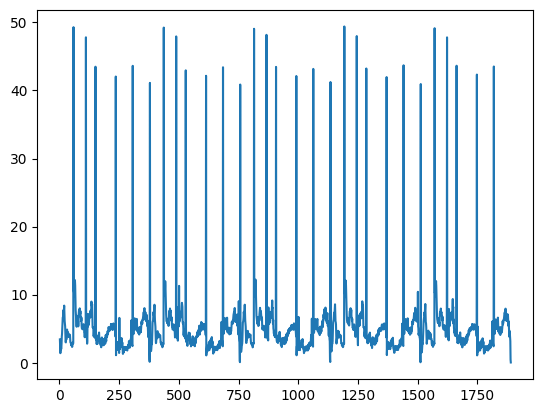

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("video_stats.csv")
plt.plot(df["Frame Number"], df["content_val"])

# Multimodal Embedding using Video

- [Documentation](https://cloud.google.com/vertex-ai/generative-ai/docs/embeddings/get-multimodal-embeddings?hl=en)
- Published: 13. February 2024

## Limitations
- Maximum number of API requests per minute per project: 120
- Maximum text length: 32 tokens (~32 words)
- Language: English
- The model doesn't consider audio content when generating video embeddings
- Only 2 minutes of content can be analyzed at a time.

In [12]:
import os
from dotenv import load_dotenv

# Load .env file
load_dotenv()

# Access environment variables
project_id = os.getenv("PROJECT_ID")
region = os.getenv("REGION")


In [2]:
from typing import Optional

import vertexai
from vertexai.vision_models import (
    Image,
    MultiModalEmbeddingModel,
    MultiModalEmbeddingResponse,
    Video,
    VideoSegmentConfig,
)

def get_image_video_text_embeddings(
    project_id: str,
    location: str,
    # image_path: str,
    video_path: str,
    contextual_text: Optional[str] = None,
    dimension: Optional[int] = 1408,
    video_segment_config: Optional[VideoSegmentConfig] = None,
) -> MultiModalEmbeddingResponse:
    """Example of how to generate multimodal embeddings from image, video, and text.

    Args:
        project_id: Google Cloud Project ID, used to initialize vertexai
        location: Google Cloud Region, used to initialize vertexai
        image_path: Path to image (local or Google Cloud Storage) to generate embeddings for.
        video_path: Path to video (local or Google Cloud Storage) to generate embeddings for.
        contextual_text: Text to generate embeddings for.
        dimension: Dimension for the returned embeddings.
            https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-multimodal-embeddings#low-dimension
        video_segment_config: Define specific segments to generate embeddings for.
            https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-multimodal-embeddings#video-best-practices
    """

    vertexai.init(project=project_id, location=location)

    model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding")
    # image = Image.load_from_file(image_path)
    video = Video.load_from_file(video_path)

    embeddings = model.get_embeddings(
        # image=image,
        video=video,
        video_segment_config=video_segment_config,
        contextual_text=contextual_text,
        dimension=dimension,
    )

    print(f"Image Embedding: {embeddings.image_embedding}")

    # Video Embeddings are segmented based on the video_segment_config.
    print("Video Embeddings:")
    for video_embedding in embeddings.video_embeddings:
        print(
            f"Video Segment: {video_embedding.start_offset_sec} - {video_embedding.end_offset_sec}"
        )
        print(f"Embedding: {video_embedding.embedding}")

    print(f"Text Embedding: {embeddings.text_embedding}")

    return embeddings

In [14]:
description = "ding dong eat it up"

embeddings = get_image_video_text_embeddings(
    project_id=project_id,
    location=region,
    video_path="./videos/video_0.mp4",
    contextual_text=description,
    dimension=1408,
    video_segment_config=VideoSegmentConfig(),
)

Image Embedding: None
Video Embeddings:
Video Segment: 0.0 - 7.0
Embedding: [-0.0164783988, 0.00555265043, -0.0507839099, -0.00705077872, 0.0129383262, 0.00815122481, -0.00199225754, 0.0176006705, 0.0259084366, -0.00636989716, 0.0359127186, 0.0162811931, 0.0104309553, 0.0546622798, 0.0235512145, -0.000240923473, -0.0258617718, -0.00572239375, 0.0131518953, -0.00153166673, -0.035899926, 0.0360128693, 0.0178243704, 0.0102895424, -0.0372905172, 0.0397546403, 0.0187873561, 0.0279374514, -0.0217028279, -0.0423821472, -0.0295050461, -0.00705053471, -0.0201185755, 0.0159726758, -0.0112961708, -0.000258254673, -0.0194508359, 0.0218148287, 0.00156787643, -0.00890624337, -0.000274719408, 0.00377620896, -0.00724597881, 0.0364222899, -0.00715896301, -0.0269070156, 0.0183024723, 0.0205809548, 0.0104628364, -0.0138913766, 0.0198588744, -0.00744725345, -0.0213004872, 0.00109791767, -0.0114637306, 0.0157851875, 0.00413389, -0.00152218121, 0.0132849924, -0.0134684946, -0.0126952538, -0.00452576391, 0.0

In [9]:
# Write list of embeddings to a file
with open("./embeddings/video_0.txt", "w") as f:
    f.write(str(embeddings.video_embeddings[0].embedding) + "\n")

with open("./embeddings/video_0.txt", "a") as f:
    f.write(str(embeddings.text_embedding) + "\n")

# Summarize videos using Gemini

# Chroma DB to store Embeddings